# Task 5: Sales Prediction!

In [1]:
#importing necessary libraries 
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [2]:
#importing Data
data_frame = pd.read_csv('Advertising.csv', index_col = 0)

####  Performing descriptive analysis. Understand the variables and their corresponding values. 

In [3]:
# Understanding the dimensions of data
data_frame.shape

(200, 4)

In [4]:
# Understanding the Data Variables
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [5]:
data_frame.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

##### * The company spent their budget for differnt products on 3 advertising medias such as TV, Radio, Newspaper and the corresponding sales for each product

In [6]:
# Show the top 5 Rows of data
data_frame.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [7]:
# Performing Descriptive Analysis
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [8]:
# Check for Duplicated Entries
data_frame.duplicated().sum()

0

#### Outlier Analysis 

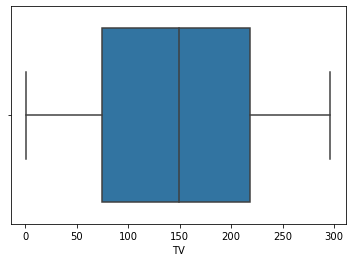

In [9]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['TV'],ax=axs)

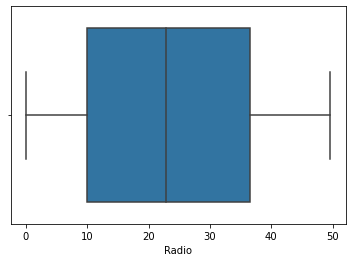

In [10]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['Radio'],ax=axs)

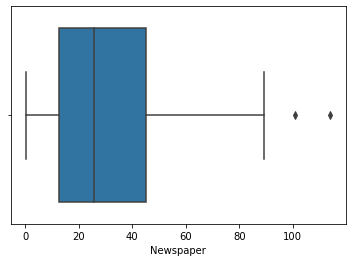

In [11]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['Newspaper'],ax=axs)

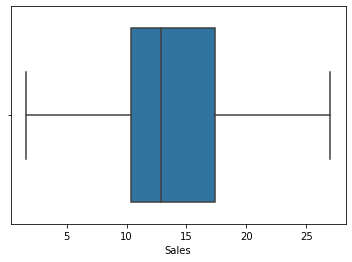

In [12]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['Sales'],ax=axs)

#### Data Visualization

###### *  Data Visualization helps to  show how the budget spent on each advertising media affect the sales of products

<AxesSubplot:xlabel='TV', ylabel='Sales'>

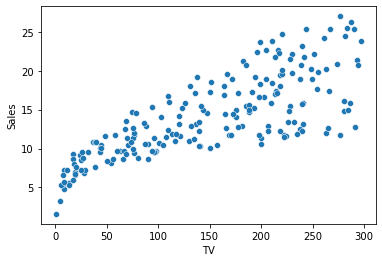

In [13]:
#Scatter plot is used find the distribution of effects of each advertising media against Target Sales variable 
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_frame,x=data_frame['TV'],y=data_frame['Sales'])

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

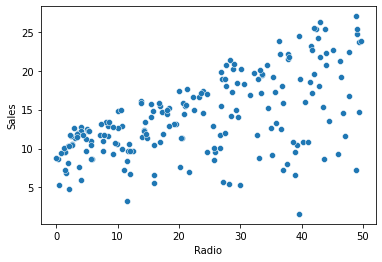

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_frame,x=data_frame['Radio'],y=data_frame['Sales'])

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

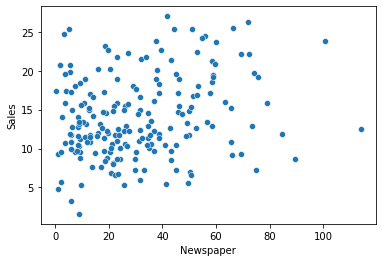

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_frame,x=data_frame['Newspaper'],y=data_frame['Sales'])

##### * It is seen that TV data set is more linear as compared to other 2 variables .

#### Heat Map

In [16]:
# find correlation between variables in data set for plotting heatmap
df_corr=data_frame.corr()

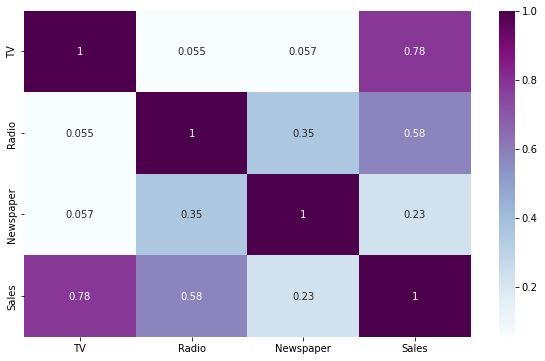

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True,cmap="BuPu")
plt.show()

##### * We can see that TV variable has highest correlation value with the target Sales variable

#### Building the Forecasting Model

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#First step in building the forecasting model is to identify the Feature(Input) variables and Target (Output) variable
features = data_frame[['TV', 'Radio', 'Newspaper']]
target = data_frame[['Sales']]

#####  * Splitting data for training and testing the model

In [20]:
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (160, 3)
Test set of features:  (40, 3)
Target for train:  (160, 1)
Target for test:  (40, 1)


### Learn the model on train data

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# Linear Regression Model ( a Supervised Machine learning Algorithm)
# LR models impose a linear function between predictor and response variables
my_model = LinearRegression()

In [23]:
# Fitting the model in train data set ie the Linear Regression Model learned from the on Train Data
my_model.fit(X_train, y_train)

LinearRegression()

#### Predicting the Sales

In [24]:
# Predicting the sales from Feature Test values
y_pred = my_model.predict(X_test)
y_pred

array([[ 8.68836492],
       [16.98238848],
       [12.43771305],
       [23.96824425],
       [18.57218907],
       [10.74129394],
       [10.08878686],
       [10.55180226],
       [ 9.76557195],
       [11.3958413 ],
       [ 6.62170828],
       [10.02119908],
       [15.3460909 ],
       [10.04962863],
       [13.63990126],
       [ 9.93555853],
       [19.9357549 ],
       [21.10230768],
       [19.74969589],
       [16.35192963],
       [15.19106077],
       [14.5566793 ],
       [14.94194537],
       [10.69147158],
       [20.79221021],
       [ 4.62604326],
       [13.92886334],
       [13.87292048],
       [18.02442024],
       [18.82728499],
       [20.41821755],
       [20.41284624],
       [17.05690494],
       [16.37285916],
       [15.07017337],
       [13.77385737],
       [21.49874806],
       [12.70552698],
       [ 7.79895559],
       [12.14617761]])

#### Test the model

In [25]:
from sklearn.metrics import mean_squared_error

##### Mean Squared Error

In [26]:
# Compare the predicted values with the true values
mean_squared_error(y_pred, y_test)

2.2045673951218223

##### Coefficient of Determination or R Squared Value (r2)

In [27]:
from sklearn.metrics import r2_score

In [28]:
# find Coefficient of Determination or R Squared Value (r2)
r2_score(y_test,y_pred)

0.9168874796108186